In [1]:
import pandas as pd
import numpy as np
np.random.seed(seed=1)

X = np.array([1, 2, 3, 4,]).reshape(-1,1)
# y=np.array([5, 6]).reshape(-1,1)
y=np.array([5, 6, 7]).reshape(-1,1)
X


array([[1],
       [2],
       [3],
       [4]])

In [2]:
y

array([[5],
       [6],
       [7]])

# Test Forward Individual

In [3]:
from Layers.InputLayer import InputLayer
from Layers.FullyConnectedLayer import FullyConnectedLayer
from Layers.TanhLayer import TanhLayer
from Layers.LinearLayer import LinearLayer
from LossFunctions.SquaredError import SquaredError

# Create network
IL = InputLayer(X)
FCLU = FullyConnectedLayer(1, 5)
ACT1 = TanhLayer()
FCLW = FullyConnectedLayer(5, 5,)
FCLV = FullyConnectedLayer(5, 3)
ACT2 = LinearLayer()
SE = SquaredError()

## IL

In [4]:
t = 0
IL_out = IL.forward(X[t])
IL_out

array([-1.34164079])

## FCLU

In [5]:
if t > 0:
    FCLU_out = FCLU.forward_with_feedback(IL_out, FCLW.getPrevOut())
else:
    FCLU_out = FCLU.forward(IL_out)
FCLU_out

array([[-5.92669485e-05, -1.21867223e-04,  1.03245534e-04,
         3.23932314e-05,  1.02548688e-04]])

In [6]:
FCLU_out.shape

(1, 5)

## ACT1

In [7]:
ACT1_out = ACT1.forward(FCLU_out)
ACT1_out

array([[-5.92669484e-05, -1.21867222e-04,  1.03245534e-04,
         3.23932314e-05,  1.02548687e-04]])

In [8]:
ACT1.getPrevIn()

[array([[-5.92669485e-05, -1.21867223e-04,  1.03245534e-04,
          3.23932314e-05,  1.02548688e-04]])]

In [9]:
ACT1.getPrevOut()

[array([[-5.92669484e-05, -1.21867222e-04,  1.03245534e-04,
          3.23932314e-05,  1.02548687e-04]])]

## FCLW (feedback)

In [10]:
FCLW_out = FCLW.forward(ACT1_out)
FCLW_out

array([[-3.68995420e-05,  3.73053684e-05,  6.69297594e-05,
        -9.63355490e-05,  5.00559807e-05]])

## FCLV

In [11]:
FCLV_out = FCLV.forward(ACT1_out)
FCLV_out

array([[-8.93402106e-05,  1.48180661e-05, -7.06538090e-05]])

In [12]:
FCLV.getPrevIn()

[array([[-5.92669484e-05, -1.21867222e-04,  1.03245534e-04,
          3.23932314e-05,  1.02548687e-04]])]

## ACT2 - Linear

In [13]:
ACT2_out = ACT2.forward(FCLV_out)
ACT2_out

array([[-8.93402106e-05,  1.48180661e-05, -7.06538090e-05]])

In [14]:
ACT2.getPrevIn()

[array([[-8.93402106e-05,  1.48180661e-05, -7.06538090e-05]])]

In [15]:
ACT2.getPrevOut()

[array([[-8.93402106e-05,  1.48180661e-05, -7.06538090e-05]])]

# Forward Altogether

In [44]:
from Layers.InputLayer import InputLayer
from Layers.FullyConnectedLayer import FullyConnectedLayer
from Layers.TanhLayer import TanhLayer
from Layers.LinearLayer import LinearLayer
from LossFunctions.SquaredError import SquaredError

# Create network
IL = InputLayer(X)
FCLU = FullyConnectedLayer(1, 5)
ACT1 = TanhLayer()
FCLW = FullyConnectedLayer(5, 5,)
FCLV = FullyConnectedLayer(5, 3)
ACT2 = LinearLayer()
SE = SquaredError()

In [45]:
for t in range(4):
    IL_out = IL.forward(X[t])

    if t > 0:
        FCLU_out = FCLU.forward_with_feedback(IL_out, FCLW.getPrevOut()[t-1])
    else:
        FCLU_out = FCLU.forward(IL_out)

    ACT1_out = ACT1.forward(FCLU_out)

    FCLW_out = FCLW.forward(ACT1_out)

    FCLV_out = FCLV.forward(ACT1_out)

    ACT2_out = ACT2.forward(FCLV_out)

ACT2_out

array([[ 9.77261633e-05,  1.59506575e-05, -2.39590095e-05]])

In [46]:
y - ACT2_out.reshape(y.shape)

array([[4.99990227],
       [5.99998405],
       [7.00002396]])

In [47]:
SE_out = SE.eval(y, ACT2_out.reshape(y.shape)) # Using only the last output from sequence to evaluate the loss
SE_out

36.666388922329226

# Test Backward individual

In [48]:
for t in range(len(X)-1, -1, -1):
    print(t)

3
2
1
0


In [49]:
ACT2.getPrevOut()[-1]

array([[ 9.77261633e-05,  1.59506575e-05, -2.39590095e-05]])

## Loop part 1: SE -> ACT 1 ->

In [12]:
y

array([[5],
       [6],
       [7]])

In [13]:
ACT2.getPrevOut()[-1] # Need to reshape...

array([[ 3.93518549e-05, -8.68090426e-05,  5.11231601e-05]])

In [50]:
grad = SE.gradient(y, ACT2.getPrevOut()[-1].reshape(y.shape)).reshape(1, -1)
grad

array([[ -9.99980455, -11.9999681 , -14.00004792]])

In [51]:
grad = ACT2.backward(grad, t_inp=3) 
grad

array([[ -9.99980455, -11.9999681 , -14.00004792]])

## Loop Part 2: Update FCLV Gradients

### Weights grad accumulator

In [52]:
FCLV.weights_grad_accum

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [53]:
FCLV.updateWeightsGradAccum(grad, t_inp=3)
FCLV.weights_grad_accum

array([[-0.00066809, -0.00080172, -0.00093535],
       [-0.00032795, -0.00039354, -0.00045914],
       [ 0.00053343,  0.00064013,  0.00074682],
       [ 0.00078355,  0.00094027,  0.00109699],
       [ 0.00072296,  0.00086756,  0.00101216]])

### Biases grad accumulator

In [54]:
FCLV.biases_grad_accum

array([[0., 0., 0.]])

In [55]:
FCLV.updateBiasesGradAccum(grad)
FCLV.biases_grad_accum

array([[ -9.99980455, -11.9999681 , -14.00004792]])

## Loop Part 3: Send backward through FCLV and ACT1

In [56]:
dhNext_dW = np.zeros((1, 5)) # Same shape as what FCLV.backward(grad) is...
dhNext_dW

array([[0., 0., 0., 0., 0.]])

In [57]:
grad = FCLV.backward(grad) + dhNext_dW
grad

array([[-9.02192248e-04, -5.18354673e-05, -6.84714234e-05,
         2.03300671e-03,  1.33489228e-04]])

In [58]:
grad = ACT1.backward(grad, t_inp=3)
grad

array([[-9.02192244e-04, -5.18354673e-05, -6.84714232e-05,
         2.03300670e-03,  1.33489227e-04]])

## Loop part 4: Update FCLW gradients if t>0

In [60]:
t = 3
t

3

In [61]:
FCLW.weights_grad_accum

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [62]:
FCLW.biases_grad_accum

array([[0., 0., 0., 0., 0.]])

(Looking at class notes): h2(t-1) is the t-1'th output of ACT1 i.e. the Tanh because Tanh is the previous input to FCLW - can use .backward() as normal

In [63]:
if t > 0:
    FCLW.updateWeightsGradAccum(grad, t_inp=t-1) # Have to use t-1
    FCLW.updateBiasesGradAccum(grad)

In [64]:
FCLW.weights_grad_accum

array([[-1.92852571e-08, -1.10803470e-09, -1.46364482e-09,
         4.34575414e-08,  2.85346508e-09],
       [ 3.86887466e-08,  2.22286245e-09,  2.93626282e-09,
        -8.71815087e-08, -5.72442394e-09],
       [ 8.22609882e-08,  4.72630616e-09,  6.24315602e-09,
        -1.85367521e-07, -1.21714145e-08],
       [ 1.00709298e-08,  5.78625406e-10,  7.64328116e-10,
        -2.26939080e-08, -1.49010441e-09],
       [-1.22515120e-08, -7.03910781e-10, -9.29822292e-10,
         2.76076479e-08,  1.81274542e-09]])

In [65]:
FCLW.biases_grad_accum

array([[-9.02192244e-04, -5.18354673e-05, -6.84714232e-05,
         2.03300670e-03,  1.33489227e-04]])

## Loop part 5: Update FCLU gradients

In [66]:
grad.shape

(1, 5)

In [67]:
FCLU.weights_grad_accum

array([[0., 0., 0., 0., 0.]])

In [68]:
FCLU.biases_grad_accum

array([[0., 0., 0., 0., 0.]])

In [70]:
FCLU.updateWeightsGradAccum(grad, t_inp=t)
FCLU.weights_grad_accum


array([[-1.21041791e-03, -6.95445771e-05, -9.18640541e-05,
         2.72756470e-03,  1.79094591e-04]])

In [72]:
FCLU.updateBiasesGradAccum(grad)
FCLU.biases_grad_accum

array([[-9.02192244e-04, -5.18354673e-05, -6.84714232e-05,
         2.03300670e-03,  1.33489227e-04]])

### Loop part 6: Update dhNext_dw

In [73]:
FCLW.backward(grad)

array([[-9.54249286e-08,  3.63345824e-08,  4.27520124e-08,
        -1.20319617e-07, -1.63156032e-07]])

In [74]:
dHnext_dW = FCLW.backward(grad)

In [75]:
dHnext_dW

array([[-9.54249286e-08,  3.63345824e-08,  4.27520124e-08,
        -1.20319617e-07, -1.63156032e-07]])

# Backwards Loop through Time

In [93]:
from Layers.InputLayer import InputLayer
from Layers.FullyConnectedLayer import FullyConnectedLayer
from Layers.TanhLayer import TanhLayer
from Layers.LinearLayer import LinearLayer
from LossFunctions.SquaredError import SquaredError

# Create network
IL = InputLayer(X)
FCLU = FullyConnectedLayer(1, 5)
ACT1 = TanhLayer()
FCLW = FullyConnectedLayer(5, 5,)
FCLV = FullyConnectedLayer(5, 3)
ACT2 = LinearLayer()
SE = SquaredError()

for t in range(4):
    IL_out = IL.forward(X[t])

    if t > 0:
        FCLU_out = FCLU.forward_with_feedback(IL_out, FCLW.getPrevOut()[t-1])
    else:
        FCLU_out = FCLU.forward(IL_out)

    ACT1_out = ACT1.forward(FCLU_out)

    FCLW_out = FCLW.forward(ACT1_out)

    FCLV_out = FCLV.forward(ACT1_out)

    ACT2_out = ACT2.forward(FCLV_out)

ACT2_out

array([[3.02641757e-05, 4.06965304e-05, 2.20667899e-05]])

In [94]:
dhNext_dW = np.zeros((1, 5)) # Same shape as what FCLV.backward(grad) is...

# LOOP
for t in range(len(X)-1, -1, -1):
    grad = SE.gradient(y, ACT2.getPrevOut()[-1].reshape(y.shape)).reshape(1, -1)
    grad = ACT2.backward(grad, t_inp=t)

    FCLV.updateWeightsGradAccum(grad, t_inp=t)
    FCLV.updateBiasesGradAccum(grad)

    grad = FCLV.backward(grad) + dhNext_dW
    grad = ACT1.backward(grad, t_inp=t)

    if t > 0:
        FCLW.updateWeightsGradAccum(grad, t_inp=t-1) # Have to use t-1
        FCLW.updateBiasesGradAccum(grad)

    FCLU.updateWeightsGradAccum(grad, t_inp=t)
    FCLU.updateBiasesGradAccum(grad)

    dHnext_dW = FCLW.backward(grad)

### Update weights

### FCLU

In [95]:
FCLU.weights

array([[ 3.80232549e-06,  5.41767821e-05,  1.37715981e-05,
        -6.85802428e-06, -3.14622184e-05]])

Vanishing gradient issue - because gradient is multiplied by small numbers multiple times, becomes small
Have to use a big learning rate to see a noticeable change in weights

In [96]:
FCLU.weights_grad_accum

array([[ 1.42938504e-12,  9.89638569e-12, -1.88404392e-11,
        -7.04559328e-12,  2.94355230e-12]])

In [97]:
FCLU.updateWeights(grad, eta=1e6) # Note not actually using grad because it's just using its own accumulated gradient
FCLU.weights

array([[ 2.37294045e-06,  4.42803964e-05,  3.26120373e-05,
         1.87568994e-07, -3.44057707e-05]])

## FCLV

In [98]:
FCLV.weights

array([[-7.10908920e-05,  5.03055634e-05, -5.55901720e-05],
       [ 3.87036487e-06,  5.70592056e-05, -9.55339144e-05],
       [-3.51275081e-05,  7.45844753e-05,  6.89419215e-05],
       [ 7.68811852e-06,  7.33216548e-05,  8.99611983e-05],
       [ 6.52813995e-05,  7.08230888e-05, -8.02513196e-05]])

In [99]:
FCLV.weights_grad_accum

array([[ 0.00359178,  0.00431013,  0.00502851],
       [ 0.00306073,  0.00367288,  0.00428504],
       [ 0.00263211,  0.00315854,  0.00368497],
       [-0.00412656, -0.00495187, -0.00577721],
       [ 0.00162161,  0.00194594,  0.00227027]])

In [100]:
FCLV.updateWeights(grad, eta=1e6) # Note not actually using grad because it's just using its own accumulated gradient

In [101]:
FCLV.weights

array([[-3591.77964978, -4310.13229805, -5028.50605066],
       [-3060.73243145, -3672.87618441, -4285.03793351],
       [-2632.11490608, -3158.53546506, -3684.97143845],
       [ 4126.56454503,  4951.87390364,  5777.20719872],
       [-1621.6147729 , -1945.93631461, -2270.26743849]])

Weight change is pretty big for FCLV...maybe don't use a higher learning rate and accept FCLU weight may not change much?

## FCLW

In [102]:
FCLW.weights

array([[ 6.23717395e-05,  7.49923290e-05,  3.76826505e-05,
         1.38988825e-05, -6.78057126e-05],
       [-6.62399545e-06, -3.09655898e-05, -5.49920084e-05,
         1.85023738e-05, -3.75460325e-05],
       [ 8.32611107e-05,  8.19271050e-05, -4.85763412e-05,
        -7.78217399e-05, -6.14074536e-05],
       [-8.31658642e-08,  4.57171336e-05, -5.83611123e-05,
        -5.03932883e-05,  7.03343750e-05],
       [-1.68302563e-05,  2.33370134e-05, -5.32667722e-05,
        -7.96065481e-05,  3.17140339e-06]])

In [104]:
FCLW.weights_grad_accum

array([[-2.42045543e-07, -1.67849229e-07,  4.12451974e-07,
         6.05778804e-07,  1.03642397e-07],
       [-2.52257088e-07, -1.74930541e-07,  4.29852715e-07,
         6.31335720e-07,  1.08014918e-07],
       [-1.96559883e-07, -1.36306682e-07,  3.34943213e-07,
         4.91939697e-07,  8.41657208e-08],
       [ 2.80256298e-07,  1.94346911e-07, -4.77564105e-07,
        -7.01410663e-07, -1.20004005e-07],
       [-7.71453777e-08, -5.34973380e-08,  1.31457753e-07,
         1.93075378e-07,  3.30331713e-08]])

In [105]:
FCLW.updateWeights(grad, eta=1e6) # Note not actually using grad because it's just using its own accumulated gradient
FCLW.weights

array([[ 0.24210791,  0.16792422, -0.41241429, -0.6057649 , -0.1037102 ],
       [ 0.25225046,  0.17489958, -0.42990771, -0.63131722, -0.10805246],
       [ 0.19664314,  0.13638861, -0.33499179, -0.49201752, -0.08422713],
       [-0.28025638, -0.19430119,  0.47750574,  0.70136027,  0.12007434],
       [ 0.07712855,  0.05352068, -0.13151102, -0.19315498, -0.03303   ]])

# Full Training

In [114]:
from Layers.InputLayer import InputLayer
from Layers.FullyConnectedLayer import FullyConnectedLayer
from Layers.TanhLayer import TanhLayer
from Layers.LinearLayer import LinearLayer
from LossFunctions.SquaredError import SquaredError

# Create network
IL = InputLayer(X)
FCLU = FullyConnectedLayer(1, 5)
ACT1 = TanhLayer()
FCLW = FullyConnectedLayer(5, 5,)
FCLV = FullyConnectedLayer(5, 3)
ACT2 = LinearLayer()
SE = SquaredError()


epochs = 50
eta = 0.001
training_dict = {"epoch": list(range(epochs)),
                 "squared_error": [],
                 "y_preds": [],}


#TODO: Loop outputs can be more efficient. Keeping explicit as separate variables for tracking purposes
for epoch in range(epochs):
    # Forward
    for t in range(len(X)):
        IL_out = IL.forward(X[t])
        if t > 0:
            FCLU_out = FCLU.forward_with_feedback(IL_out, FCLW.getPrevOut()[t-1])
        else:
            FCLU_out = FCLU.forward(IL_out)
        ACT1_out = ACT1.forward(FCLU_out)
        FCLW_out = FCLW.forward(ACT1_out)
        FCLV_out = FCLV.forward(ACT1_out)
        ACT2_out = ACT2.forward(FCLV_out)

    # Predictions and Loss
    # training_dict["y_preds"].append(ACT2_out.reshape(y.shape))
    training_dict["y_preds"].append(ACT2_out)

    error = SE.eval(y, ACT2_out.reshape(y.shape))
    training_dict["squared_error"].append(error)

    # Backward
    dhNext_dW = np.zeros((1, 5)) # Same shape as what FCLV.backward(grad) is...
    for t in range(len(X)-1, -1, -1):
        grad = SE.gradient(y, ACT2.getPrevOut()[-1].reshape(y.shape)).reshape(1, -1)
        grad = ACT2.backward(grad, t_inp=t)

        FCLV.updateWeightsGradAccum(grad, t_inp=t)
        FCLV.updateBiasesGradAccum(grad)

        grad = FCLV.backward(grad) + dhNext_dW
        grad = ACT1.backward(grad, t_inp=t)

        if t > 0:
            FCLW.updateWeightsGradAccum(grad, t_inp=t-1) # Have to use t-1
            FCLW.updateBiasesGradAccum(grad)

        FCLU.updateWeightsGradAccum(grad, t_inp=t)
        FCLU.updateBiasesGradAccum(grad)

        dHnext_dW = FCLW.backward(grad)

    # Update weights   
    FCLU.updateWeights(grad, eta=eta)
    FCLV.updateWeights(grad, eta=eta)
    FCLW.updateWeights(grad, eta=eta)

## Examine Outputs

In [116]:
df = pd.DataFrame(training_dict)
df

,epoch,squared_error,y_preds
0,0,36.666627,"[[1.2099250201445788e-05, 3.433328095955348e-0..."
1,1,36.082307,"[[0.040012003668248274, 0.04803406016236948, 0..."
2,2,34.932329,"[[0.11969181340112009, 0.1436495164123391, 0.1..."
3,3,33.253419,"[[0.23841409029439736, 0.2861157790482189, 0.3..."
4,4,31.099193,"[[0.39522905675714043, 0.4742931191168578, 0.5..."
5,5,28.538449,"[[0.5888821941252298, 0.7066761196742304, 0.82..."
6,6,25.652967,"[[0.8178242789628763, 0.981405719274073, 1.144..."
7,7,22.534898,"[[1.080223776984037, 1.2962840845852528, 1.512..."
8,8,19.283820,"[[1.3739814954129514, 1.6487921931228848, 1.92..."
9,9,16.003561,"[[1.696747376536892, 2.0361099853991256, 2.375..."


In [122]:
df["y_preds"].loc[17] # where min is

array([[4.97484388, 5.96981303, 6.96478134]])

## Plot errors

<AxesSubplot: xlabel='epoch'>

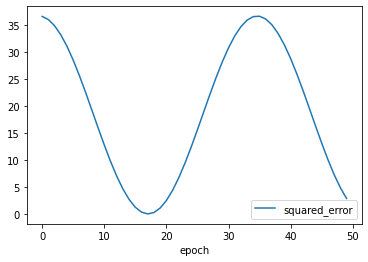

In [117]:
df.plot(x="epoch", y="squared_error")

Error reaches a minimum then goes back?
* Wonder if it has to do with one of the layers' weights not changing enough due to vanishing gradients
* Is the tanh doing something?

In [130]:
X.reshape(-1)

array([1, 2, 3, 4])

In [128]:
graph_index_lst = [0, 9, 17]
y_preds_graph = df["y_preds"].loc[graph_index_lst].to_numpy()
y_preds_graph

array([array([[ 1.20992502e-05,  3.43332810e-05, -2.94946189e-05]]),
       array([[1.69674738, 2.03610999, 2.37541567]]),
       array([[4.97484388, 5.96981303, 6.96478134]])], dtype=object)

In [143]:
X = X.astype(float)
np.concatenate((X.flatten(), y_preds_graph[0].flatten()))

seq_vals = 

array([ 1.00000000e+00,  2.00000000e+00,  3.00000000e+00,  4.00000000e+00,
        1.20992502e-05,  3.43332810e-05, -2.94946189e-05])

In [145]:
np.arange(len(X), len(X)+len(y))

array([4, 5, 6])

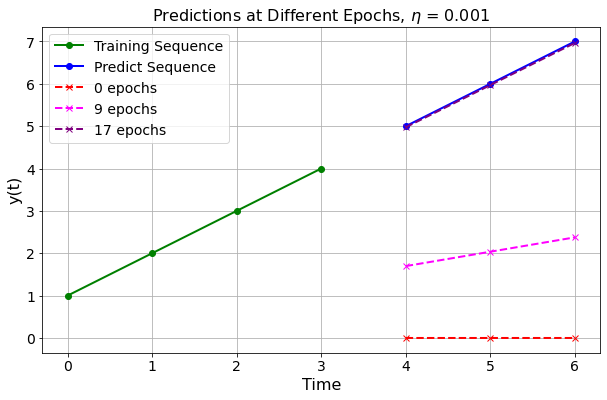

In [153]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
t_vals_x = np.arange(len(X))
t_vals_y = np.arange(len(X), len(X)+len(y))

ax.plot(t_vals_x, X.flatten(), color="green", linestyle="solid", label="Training Sequence", linewidth=2, marker="o")
ax.plot(t_vals_y, y.flatten(), color="blue", linestyle="solid", label="Predict Sequence", linewidth=2, marker="o")

colors = ["red", "magenta", "purple"]
for ind, y_pred_seq, color in zip(graph_index_lst, y_preds_graph, colors):
    ax.plot(t_vals_y, y_pred_seq.flatten(), color = color, linestyle="dashed", label=f"{ind} epochs", linewidth=2, marker="x")


ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("y(t)", fontsize=16)
ax.set_title(f"Predictions at Different Epochs, $\eta$ = {eta}", 
             fontsize=16)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.legend(fontsize=14)
ax.grid()
plt.show()

In [ ]:



ax.set_xlabel("Epochs", fontsize=16)
ax.set_ylabel("Cross Entropy Loss", fontsize=16)
ax.set_title(f"Cross Entropy Loss vs. Epochs for Happy Face Images, $\eta$ = {eta}", 
             fontsize=16)

ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

ax.legend(fontsize=14)
ax.grid()
plt.show()